# **Algorithm trading system for Tata Steel**



[*********************100%%**********************]  1 of 1 completed


                   Stock      holdings           cash          total   returns
Date                                                                          
2020-01-01      0.000000      0.000000  100000.000000  100000.000000       NaN
2020-01-02      0.000000      0.000000  100000.000000  100000.000000  0.000000
2020-01-03      0.000000      0.000000  100000.000000  100000.000000  0.000000
2020-01-06      0.000000      0.000000  100000.000000  100000.000000  0.000000
2020-01-07      0.000000      0.000000  100000.000000  100000.000000  0.000000
...                  ...           ...            ...            ...       ...
2022-12-26  10500.000000  10500.000000   96465.501404  106965.501404  0.002578
2022-12-27  11115.000153  11115.000153   96465.501404  107580.501556  0.005750
2022-12-28  11000.000000  11000.000000   96465.501404  107465.501404 -0.001069
2022-12-29  11175.000000  11175.000000   96465.501404  107640.501404  0.001628
2022-12-30  11265.000153  11265.000153   96465.50140

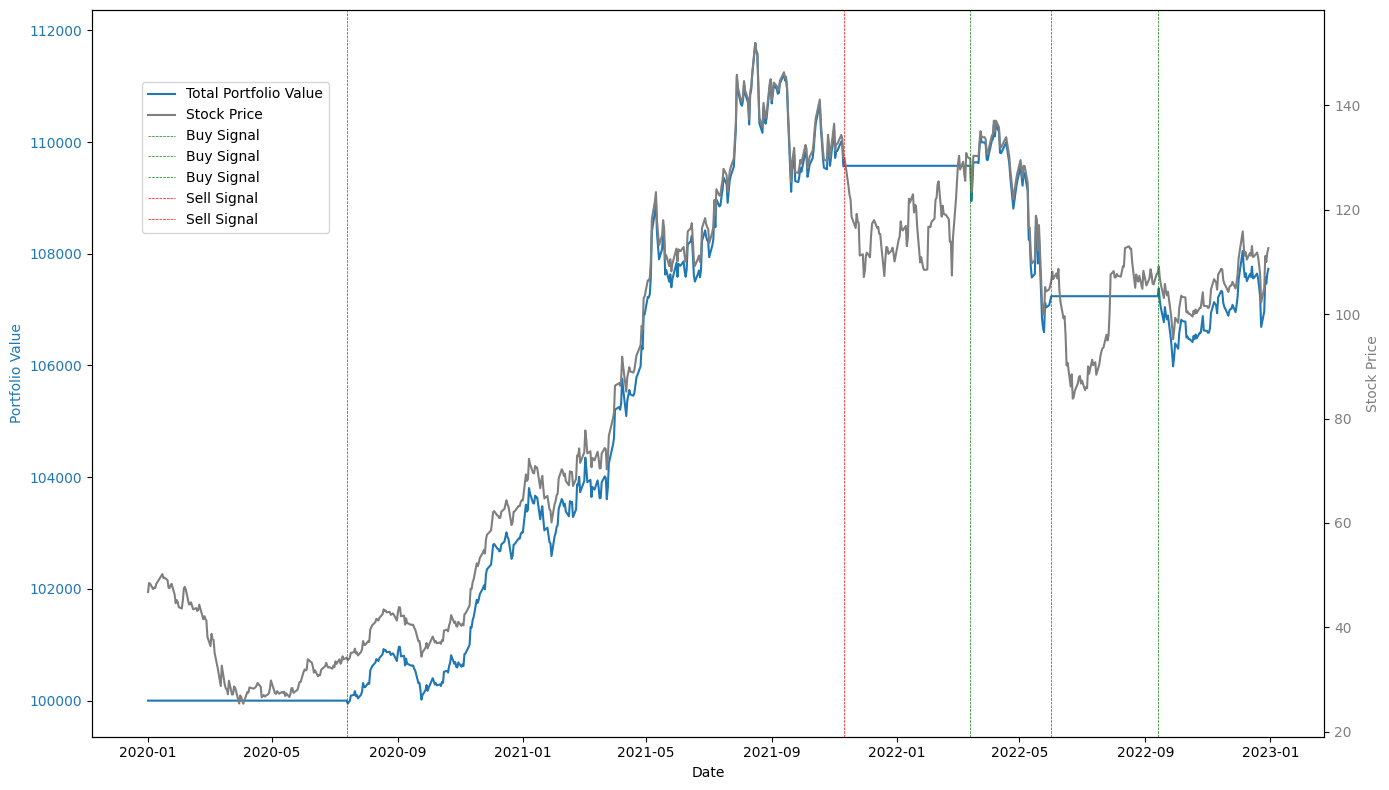

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

def get_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

def calculate_sma(data, window):
    return data['Close'].rolling(window=window).mean()

def generate_signals(data, short_window, long_window):
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data['Close']
    signals['short_mavg'] = calculate_sma(data, short_window)
    signals['long_mavg'] = calculate_sma(data, long_window)
    signals['signal'] = 0.0
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['positions'] = signals['signal'].diff()
    return signals

def backtest_strategy(data, signals, initial_capital=10000):
    positions = pd.DataFrame(index=signals.index).fillna(0.0)
    positions['Stock'] = 100 * signals['signal']
    portfolio = positions.multiply(data['Close'], axis=0)
    pos_diff = positions.diff()
    portfolio['holdings'] = (positions.multiply(data['Close'], axis=0)).sum(axis=1)
    portfolio['cash'] = initial_capital - (pos_diff.multiply(data['Close'], axis=0)).sum(axis=1).cumsum()
    portfolio['total'] = portfolio['cash'] + portfolio['holdings']
    portfolio['returns'] = portfolio['total'].pct_change()
    return portfolio

# Parameters
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-01-01'
short_window = 40
long_window = 100
initial_capital = 10000

# Get data
data = get_data(ticker, start_date, end_date)

# Generate signals
signals = generate_signals(data, short_window, long_window)

# Backtest strategy
portfolio = backtest_strategy(data, signals, initial_capital)

print(portfolio)


Algorithm for Tata steel for 2nd jun 2024

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Function to get data
def get_data(ticker, period="1y"):
    data = yf.download(ticker, period=period)
    return data

# Function to calculate SMA
def calculate_sma(data, window):
    return data['Close'].rolling(window=window).mean()

# Function to generate signals
def generate_signals(data, short_window, long_window):
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data['Close']
    signals['short_mavg'] = calculate_sma(data, short_window)
    signals['long_mavg'] = calculate_sma(data, long_window)
    signals['signal'] = 0.0
    signals['signal'] = np.where(signals['short_mavg'] > signals['long_mavg'], 1.0, 0.0)
    return signals

# Parameters
ticker = 'TATASTEEL.NS'
short_window = 40
long_window = 100

# Get recent data
data = get_data(ticker, period="1y")

# Generate signals
signals = generate_signals(data, short_window, long_window)

# Predict today's signal
latest_signal = signals['signal'].iloc[-1]

# Output today's prediction
if latest_signal == 1.0:
    print("Today's Signal: BUY")
else:
    print("Today's Signal: SELL")


[*********************100%%**********************]  1 of 1 completed

Today's Signal: BUY
